<h1><center>Laboratorio 9: Los huesos de Hipócrates 🦴</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Matías Rojas y Mauricio Araneda
- Auxiliar: Ignacio Meza D.
- Ayudante: Rodrigo Guerra

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Cristóbal Alcázar
- Nombre de alumno 2: Gianina Salomó


### **Link de repositorio de GitHub:** `https://github.com/alcazar90/sci-prog-lab`

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Creación de clasificadores de imagenes a traves de redes Fully connected y CNN.
- Uso de Dataloaders para la carga de datasets.
- Comparación de Fully Connected y red convolucional.

## Reglas:

- Fecha de entrega: 17/11/2022
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquier material del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Creación de modelos de clasificación de imágenes utilizando Pytorch.
- Creación de dataloader y aplicar transformaciones sobre el dataset.
- Comprender la diferencia entre una CNN y una Fully Connected.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones de `Pytorch`, la cual, está enfocada para proyectos de Deep Learning.


# Importamos librerias utiles 😸

Comenzamos importando librerías utiles para la ejecución del laboratorio:

In [ ]:
import os
import time
from glob import glob
from PIL import Image

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

import torchvision
from torchvision import datasets, models
from torchvision import transforms as T

from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Identificando los Huesos de Hipócrates🔎

<p align="center">
  <img src="https://i.pinimg.com/originals/d8/58/66/d85866cd1cc3979f94526551addf74b4.gif" width="300">
</p>

Tras el éxito que han tenido proponiendo modelos de machine learning en trabajos anteriores, el famoso medico Hipócrates se ha contactado con ustedes para solicitarles ayuda para automatizar la identificación de radiografías de partes humanas. Para esto, les señala que le gustaría utilizar algoritmos de deep learning producto que Demócrito le señalo que resultan la mejor alternativa para la predicción de imágenes.

En su conversación con el medico usted le comenta que ha tenido algunas clases relacionadas a Deep Learning, por esto, están motivados en abordar el problema utilizando redes Fully Connected y redes convolucionales con Pytorch. Sin embargo, al anunciarle los tipos de redes que conocen, el filósofo les comenta que no había escuchado muy buenos resultados por parte de las CNN, por lo que les pide que comprueben a traves de la métrica de accuracy que tipo de redes es mejor para la tarea de identificación de radiografías. ¿Será cierto lo que dice el filósofo?, Veámoslo en un nuevo capítulo de los Laboratorios de Programación Científica para Ciencia de Datos!

## 1.1 Creación de Lista de Archivos

<p align="center">
  <img src="https://media.tenor.com/BJ-9w-MUVCMAAAAM/tis100-sad.gif" width="300">
</p>


Comience revisando de forma manual cada una de las imágenes que posee la carpeta subida a material docente. Verifique la cantidad de tipos de radiografías que se tienen y la cantidad de imágenes que dispone cada carpeta.

Revisado el contenido de las imágenes, utilice `os.listdir` para crear un `numpy.array` o un `Dataframe` que contenga las imágenes y un label que señale al tipo de radiografía a la que hace referencia la imagen. Para hacer las etiquetas codifique el tipo de imágenes en números que vayan del 0 al total de tipos de radiografías, no utilice strings para codificar las etiquetas.

**Ejemplo de Estructura:**

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax"></th>
    <th class="tg-0lax">image_path</th>
    <th class="tg-0lax">label</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">0</td>
    <td class="tg-0lax">image1</td>
    <td class="tg-0lax">1</td>
  </tr>
  <tr>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">image2</td>
    <td class="tg-0lax">0</td>
  </tr>
  <tr>
    <td class="tg-0lax">2</td>
    <td class="tg-0lax">image3</td>
    <td class="tg-0lax">2</td>
  </tr>
  <tr>
    <td class="tg-0lax">3</td>
    <td class="tg-0lax">image4</td>
    <td class="tg-0lax">0</td>
  </tr>
  <tr>
    <td class="tg-0lax">4</td>
    <td class="tg-0lax">image5</td>
    <td class="tg-0lax">4</td>
  </tr>
</tbody>
</table>

In [ ]:
# Código Aquí
#for i, category in enumerate(os.listdir("ruta de carpeta")):
#    for image i n os.listdir("ruta de subcarpetas"):

In [ ]:
%%capture
!unzip gdrive/My\ Drive/Medical-MNIST.zip

In [ ]:
path_df = pd.DataFrame([
    {
        "image_path": "/".join(f.split("/")[1:]),
        "label": f.split("/")[1]
    }
    for f in glob("Medical-MNIST/*/*.jpeg")
])

path_df["label"] = path_df["label"].replace(
    sorted(path_df["label"].unique()),
    range(path_df["label"].nunique())
)

path_df.head()

,image_path,label
0,Hand/008745.jpeg,4
1,Hand/007006.jpeg,4
2,Hand/004826.jpeg,4
3,Hand/002630.jpeg,4
4,Hand/009559.jpeg,4


In [ ]:
path_df["label"].value_counts()

4    10000
3    10000
2    10000
0    10000
5    10000
1     8954
Name: label, dtype: int64

- Las clases se encuentran balanceadas

## 1.2 Creación de Dataset

Tomando en cuenta la estructura de datos desarrollada en el punto 1.1, construya la clase `MedicalDataset()` que cumpla los siguientes puntos:

- [X] Poseer un `__init__` en el que se almacene `estructura` creada en 1.1, la `raiz` de la carpeta y una función que permita transformar el dataset (de esto no se preocupe mucho, ya que solamente debe almacenar una función en el atributo).
- [X] La clase debe ser capaz de entregar la cantidad de elementos a traves de `__len__`.
- [X] Debe poseer el método `__getitem__` que retorne una tupla con la imagen y su correspondiente etiqueta.

In [ ]:
# Código Aquí
class MedicalDataset(Dataset):
    def __init__(self, estructura, raiz, transform=False):
        self.estructura = estructura
        self.raiz = raiz
        self.transform = transform
    
    def __getitem__(self, idx):
        
        # Un poco de ayuda para cargar la imagen
        img_path = os.path.join(self.raiz, self.estructura["image_path"][idx])
        image = Image.open(img_path).convert('RGB')
        label = self.estructura["label"][idx]
        
        # Auida para realizar la transformación
        if self.transform:
            image = self.transform(image)
        
        return image, label
    
    def __len__(self):
        return self.estructura.shape[0]

## 1.3 Prueba del MedicalDataset

Con la clase construida en el punto 1.2, verifique su funcionamiento cargando el dataset y realizando las transformaciones que entrega la función `transform_image`. Compruebe a través de un ejemplo las transformaciones aplicadas en la imagen, comentando la función que cumple `MedicalDataset` y si es posible observar todas las transformaciones aplicadas con la función `transform_image`.

- [X] Probar la clase MedicalDataset y aplicando una transformación de "train"
- [X] Plotear un ejemplo del MedicalDataset.

**Función para transformar las imagenes:**

In [ ]:
def transform_image(stage = None):
    
    if stage == "train":
        Tr_img = T.Compose([
                  T.Resize(size = (64,64)),
                  #T.Resize(size = (256,256)),
                  T.RandomRotation(degrees = (-20,+20)),
                  T.ToTensor()])
        
    elif stage == "test" or stage == "val":
        Tr_img = T.Compose([
                  T.Resize(size = (64,64)), 
                  T.ToTensor()]) 

    return Tr_img

**Código para obtener un ejemplo:**

In [ ]:
# Prueba del dataset
dataset = MedicalDataset(path_df, "Medical-MNIST", transform_image("train"))


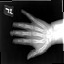

In [ ]:
example_image, example_label = dataset[0]
# Utilice plotly para plotear un ejemplo
px.imshow(example_image.numpy().T)


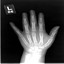

In [ ]:
# Imagen sin transformación
dataset_sint = MedicalDataset(path_df, "Medical-MNIST")
example_image_sint, example_label_sint = dataset_sint[0]
px.imshow(example_image_sint)

> Comente que realiza la clase construida y las transformaciones aplicadas.

La clase `MedicalDataset` permite construir el _dataset_, en base a imágenes que se encuentran organizadas en una estructura de carpetas (_aka ImageFolder_), y cuyas etiquetas son los nombres
de los directorios. El funcionamiento de la clase es navegar
por esta estructura y cargar la información de las
imágenes de manera organizada y con sus etiquetas respectivas:

* Una observación en el _dataset_ se constituye por una imagen
representada como un `array`, o un `Tensor`, y una etiqueta representada por un entero. Por lo que una observación se
conforma por la siguiente tupla: `(imagen, etiqueta)`.
* La clase requiere un _dataframe_ (`path_df`) con dos columnas, donde la
primera tiene el nombre de la imagen y la segunda su etiqueta. Es
decir, una tabla con el inventario de todas las observaciones del _dataset_.
* En base la información anterior, específicamente la primera 
columna, la clase `MedicalDataset` tiene la capacidad de
reconstruir el `path` donde se encuentra la imagen. Esto en conjunto con el atributo `self.raiz`, que indica la ubicación del directorio donde se encuentra la estructura de carpetas con las imágenes, y así luego importar la imagen en un arreglo `numpy` usando `Image.open(img_path).convert('RGB')`.
* La funcionalidad anterior es realizada por el método `MedicalDataset.__getitem__()`. Lo que permite acceder por índices
a las observaciones del _dataset_. Por ejemplo,  `image_0, label_0 = MedicalDataset(..)[0]` nos entrega la tupla correspondiente
a la primera observación.
* Un punto a destacar de lo anterior, la clase `MedicalDataset` tiene la capacidad de cargar las observaciones que uno requiere, pero en ningún caso, como se puede apreciar en el código, importa todas las imágenes cuando se inicializa. Esto no es un error, por el tamaño de las imágenes, es más ventajoso que esta clase funcione
como un rutero con capacidad de catrastrar la información y cargarla cuando se requiere para no colapsar la memoría. 
* Luego veremos que hay una especie de orquestado que aprovecha
la funcionalidad de `MedicalDataset` para ir solicitando
observaciones a medida que las necesita: `DataLoader`.
* Es posible saber la cantidad de observaciones del _dataset_ utilizando el método `MedicalDataset.__len__(self)`, que inspecciona la cantidad de filas del
_dataframe_ inventario de todas las observaciones.
* Además, es posible posterior a importar una imagen, aplicar
un conjunto de transformaciones como rotaciones, resize, entre 
otras. Esto se realiza con el atributo `self.transform`.

**Respecto a las transformaciones:**

* Las transformaciones aplicadas consisten en realizar una rotación de 20 grados de la imagen original, y aplicar un redimensionamiento a 64x64 pixeles.Además,  se cambia la estructura del tipo de dato de la imagen almacenada originalmente en numpy, a tipo de dato Tensor.

* En este caso particular no cambia el tamaño de la imagen, ya que todas las imágenes son originalmente de 64x64, pero se debe tener en cuenta esta transformación en caso de que la red se entrene con otro conjunto de datos, o que se evalúe con imágenes de otro tamaño.

## 1.4 Creación de Clasificadores

<p align="center">
  <img src="https://149695847.v2.pressablecdn.com/wp-content/uploads/2018/01/conv-full-layer.gif" width="300">
</p>

A continuación, deben construir tres clasificadores con los que deberán verificar cuál de las arquitecturas posee un mejor desempeño para la tarea de clasificación de imágenes. Para la construcción considere los siguientes puntos:

- [X] Señale cual es el objetivo del `forward` en este tipo de redes, sea breve para su explicación.
- [X] Construir una red Fully Connected para solucionar el problema de clasificación. Para esta parte se le aconseja que rellene el esqueleto dispuesto más abajo y que lleva el nombre de `FCClassifier`, en el deberá rellenar con la dimensión de las capas ocultas y verificar cual será el tamaño de la entrada.
- [X] Construya una red convolucional **simple** (no más de una capa convolucional) para la tarea de clasificación de imágenes, para esto basen su código en la clase del día `09-11-2022`.
- [X] Crear una red convolucional más compleja. Para esta parte tienen completa libertad en la construcción de su red, lo único que debe cumplir es que sea convolucional.

**Esqueletos Propuestos:**

**Objetivo del método `forward`**: El
_forward_ pass son todas las operaciones
que se aplican al _input_ para llegar al output, o predicción. Corresponde a cómo la información del _input_ fluye a través de las capas que conforman la arquitectura de la red, aplicandose las operaciones lineales usando los parámetros (iniciados generalmente de forma aleatoria cuando se crea la red), funciones de activación no lineales, y otros mecanismos que se utilizan cuando se computan las predicciones durante entrenamiento (i.e. capas de dropout). Su retorno incluye de forma general la salida de la red para una entrada dada, que puede haber pasado o no por una función de activación de la capa de salida, dependiendo de la implementación.

In [ ]:
# Construir una red Fully Connected para solucionar el problema de clasificación.
# Para esta parte se le aconseja que rellene el esqueleto dispuesto más abajo
# y que lleva el nombre de FCClassifier...
class FCClassifier(nn.Module):
    # ... en él deberá rellenar con la dimensión de las capas ocultas...:
    # R: Para ello agregamos un nuevo parámetro de lista que contiene
    # la cantidad de neuronas de cada capa oculta.
    def __init__(self, in_channels: int, hidden_sizes: list, num_classes: int):
        super(FCClassifier, self).__init__()
        self.flatten = nn.Flatten()

        # ...y verificar cual será el tamaño de la entrada.
        assert isinstance(in_channels, int) and in_channels > 0

        # Se asigna entrada a primera capa oculta
        self.lin1 =  nn.Sequential(
            nn.Linear(in_channels, hidden_sizes[0]),
            nn.ReLU()
        )

        # Se genera las siguientes capas ocultas
        if len(hidden_sizes) > 1:
          self.other_lin = torch.nn.ModuleList([
              nn.Sequential(
                  nn.Linear(hidden_sizes[i], s),
                  nn.ReLU()
              )
              for i, s in enumerate(hidden_sizes[1:])         
          ])

        else:
          self.other_lin = torch.nn.ModuleList([])

        # Se cambia nombre a capa de salida
        self.lin_out = nn.Linear(hidden_sizes[-1], num_classes)
        
    def forward(self, x):
        x = self.lin1(self.flatten(x))

        # Otras capas ocultas
        for lin in self.other_lin:
          out = lin(x)

        # Capa de salida (no se aplica activación)
        x = self.lin_out(x)

        return x

In [ ]:
class CNNClassifier1(nn.Module):

    def __init__(self, in_channels, out_channels, num_classes):
      super().__init__()
      self.conv_layer = nn.Conv2d(in_channels, out_channels, kernel_size=3,
                                  padding=1)
      # kernel_size=3 + padding=1 -> conserva las dimensiones de la imagen
      # original luego de aplicar la capa convolucional
      self.fc = nn.Linear(64 * 64 * out_channels, num_classes)

    def forward(self, x):
      out = F.relu(self.conv_layer(x))
      out = torch.flatten(out, 1)
      out = self.fc(out)
      return out

    
class CNNClassifier2(nn.Module):

    def __init__(self, in_channels, mid_channels, num_classes):
      super().__init__()
      # Combinación kernel_size=3 y padding=1 permiten conservar
      # las dimensiones del input una vez aplicada la capa convolucional
      # Elección: facilita pasar luego a la capa lineal debido a que no
      # hay que llevar un "conteo" de la pérdida de pixeles cada vez que
      # se aplica un kernel en una capa convolucional. Razón práctica.
      self.conv_layer1 = nn.Conv2d(in_channels, mid_channels[0], kernel_size=3,
                                   padding=1)

      # Se genera los siguientes bloques convolcuionales intermedios 
      if len(mid_channels) > 1:
        self.other_conv = torch.nn.ModuleList([
            nn.Sequential(
                nn.MaxPool2d(2, 2),
                nn.Conv2d(mid_channels[i], mid_channels[i+1], kernel_size=3,
                          padding=1),
                nn.ReLU(),
                # La introducción de más bloques puede provocar overfitting
                # para alivianar este problema se agrega una capa de dropout
                # como regularización (50% de las neuronas se apaga -> p=0.5)
                nn.Dropout(p=0.5)
          )
            for i, s in enumerate(mid_channels[:-1])         
        ])
        # Factor que lleva la cuenta de cuantas veces las dimensiones
        # de la imagen inicia HxW son reducidas a la mitad por la capa de
        # nn.MaxPool2d(2,2)
        self.shrink_factor = 2 ** (len(mid_channels)-1)

      else:
        self.other_conv = torch.nn.ModuleList([])
        # Si no hay capas convolucionales, el factor es 1 (no se reduce)
        self.shrink_factor = 2 ** 0

      self.fc = nn.Linear(int(64 / self.shrink_factor) * int(64 / self.shrink_factor) * mid_channels[-1], num_classes)


    def forward(self, x):
      out = F.relu(self.conv_layer1(x))

      # Aplicar bloques convolucionales intermedios: conv - act - pool
      for conv in self.other_conv:
        out = conv(out)

      # Aplanar el vector
      out = torch.flatten(out, 1)

      # Apicar capa fully connected
      out = self.fc(out)
      return out

Realizamos un _sanity check_ con las arquitecturas convolucionales 
para verificar si el diseño de las capas están correctamente
especificados según las dimensiones del _input_.

Para esto, utilizamos una solo imagen a color de ejemplo (`3x64x64`), y agregamos una dimensión adicional que indica
el tamaño del _batch_ (`1x3x64x64`). Esto lo podemos
hacer facilmente usando el método `.unsqueeze(0)` para agregar
una dimensión a un tensor en la posición 0 (aka primera). Luego, probamos
si la información fluye corrrectamente en el _forward pass_:

In [ ]:
# Si no arroja error significa que la arquitectura responde a las
# dimensiones del dataset
torch.manual_seed(666)

cnn = CNNClassifier1(in_channels=3, out_channels=10, num_classes=4)
cnn(dataset[0][0].unsqueeze(0))

tensor([[ 0.0212,  0.0151, -0.1896, -0.0924]], grad_fn=<AddmmBackward0>)

Ahora, probamos la red convolucional más compleja que
permite agregar bloques convoluciones intermedio, cada bloque
esta compuesto por:

> `nn.MaxPool2d(2,2)` -> `nn.Conv2d(mid_channels[i], mid_channels[i+1])` -> `nn.ReLU() `

Notemos que siempre reducimos el tamaño de la imagen sobre
la que se esta aplicando el kernel a la mitad (i.e. 64 - 32 - 16),
tantos bloques apliquemos (i.e. `len(mid_channels`). Los parámetros de cada capa convolucional se encuentran especificados
en los elementos de `mid_channels`.

Ahora probemos el funcionamiento con un `len(mid_channels)=1` y
cuyo tamaño de canal es `10`. Esto debiera ser equivalente a la
primera arquitectura convolucional con `out_channels=10`. Donde
técnicamente no utilizamos ningún bloque convolucional.

In [ ]:
torch.manual_seed(666)

cnn2 = CNNClassifier2(in_channels=3, mid_channels=[10], num_classes=4)
cnn2(dataset[0][0].unsqueeze(0))

tensor([[ 0.0212,  0.0151, -0.1896, -0.0924]], grad_fn=<AddmmBackward0>)

Los resultados son iguales.

Ahora probemos una red más compleja, con 4 bloques 
convolucionales: `mid_channels=[10, 50, 75, 50]`.

In [ ]:
torch.manual_seed(666)

cnn2 = CNNClassifier2(in_channels=3, mid_channels=[10, 50, 75, 50], num_classes=4)
cnn2(dataset[0][0].unsqueeze(0))

tensor([[-0.0573,  0.0896,  0.0545, -0.0064]], grad_fn=<AddmmBackward0>)

Ambas implementaciones de redes convolucionales están
funcionando correctamente!


## 1.5 Separando Datos para el Entrenamiento

<p align="center">
  <img src="https://c.tenor.com/Esn7Jif-ZLQAAAAC/separate-square.gif" width="200">
</p>

Utilizando un Holdout a su gusto, separe los datos en un conjunto de entrenamiento y de testing. Aplique las transformaciones correspondientes usando `transform_image` para cada conjunto de datos y utilice `torch.utils.data.DataLoader` para crear un objeto iterable del dataset.

- [X] Definir el Holdout a utilizar.
- [X] Separar los datos en un conjunto de entrenamiento y prueba.
- [X] Aplicar las transformaciones correspondientes en cada uno de los dataset.
- [X] Utilizar `DataLoader` de pytorch sobre los dataset.

**Definir holdout a utilizar**

Se crean _dataframes_ con inventarios de observaciones para el conjunto de entrenamiento y prueba siguiendo una proporción de 80-20 respectivamente. Además, se define _samplear_ las observaciones proporcional según las etiquetas, es decir, un
_sampleo_ estratificado para que en ambos conjunto se mantenga
una distribución de etiquetas similares.

In [ ]:
# Separar los datos en un conjunto de entrenamiento y prueba.
path_df_train, path_df_test = train_test_split(path_df, 
                                               test_size=0.2, 
                                               stratify=path_df['label'], 
                                               random_state=42)

# Se reinician los índices
path_df_train = path_df_train.reset_index(drop=True)
path_df_test = path_df_test.reset_index(drop=True)

In [ ]:
# Número de observaciones por dataset
# Cada dataset tiene 2 columnas, una con la ruta de imagen y otra con su etiqueta
path_df_train.shape, path_df_test.shape

((47163, 2), (11791, 2))

Verificamos si ambos _dataframes_
se encuentran balanceados respecto a los
_labels_.

In [ ]:
path_df_test["label"].value_counts()

3    2000
4    2000
0    2000
2    2000
5    2000
1    1791
Name: label, dtype: int64

In [ ]:
path_df_train["label"].value_counts()

2    8000
5    8000
3    8000
0    8000
4    8000
1    7163
Name: label, dtype: int64

Ahora creamos cada _dataset_ utilizando la clase `MedicalDataset` con los parámetros respectivos, tanto
con los inventarios de observaciones y las transformaciones, para cada uno
de los conjuntos que buscamos crear.

In [ ]:
# Aplicar las transformaciones correspondientes en cada uno de los dataset.
train_dataset = MedicalDataset(path_df_train, "Medical-MNIST", transform_image("train"))
test_dataset = MedicalDataset(path_df_test, "Medical-MNIST", transform_image("test"))

In [ ]:
# Utilizar DataLoader de pytorch sobre los dataset
# Definimos un batch size de 128 con shuffle para entrenamiento
torch.manual_seed(666)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

## 1.6 Creación de Funciones de Entrenamiento y Evaluación

<p align="center">
  <img src="https://www.researchgate.net/publication/319535615/figure/fig3/AS:536187598065664@1504848493070/A-typical-convolutional-neural-network-CNN-Architecture-for-Medical-Image-Classification.png" width="500">
</p>


Ya construido todas las funciones y clases necesarias llego el momento más importante... probar la red. Para esta sección, ustedes deberán ser capaces de definir los hiperparámetros de la red, definir las funciones de perdida a utilizar, señalar el optimizador a usar y finalmente crear sus funciones para el entrenamiento y prueba. Para realizar esta parte más estructurada, seguir los siguientes puntos de forma secuencial:

- [ ] Especifique los Hiperparámetros de las 3 redes. Para esta parte sea claro de su elección y señale el porqué de sus elecciones (o sea justifique el setting de sus hiperparámetros).
- [ ] Defina los modelos a utilizar, el optimizador que utilizará para el modelo y señale la función de perdida que utilizará.
- [X] Explique de forma breve la función que cumplen los pasos `Backward` y `Descenso del gradiente` en una red neuronal.
- [ ] Cree una función llamado `train` que entrene a los clasificadores. Para esto, recuerde que estos modelos suelen utilizar un número de épocas, por lo que deberá generar un proceso iterativo de entrenamiento. Es importante que su función imprima las `loss` obtenidas por el modelo en cada época (si gusta puede almacenar estas losses en una lista para luego graficarlas y comparar).
- [ ] Diseñe una función para evaluar el desempeño de las redes. Para evaluar las redes utilice solamente la métrica accuracy (para esto se le recomienda comparar la predicción con el ground truth)

In [ ]:
# Especificar hyperparámetros de las redes
in_channels_fc = 64 * 64 * 3
in_channels_cnn = 3 
mid_channels_cnn = [10, 50, 75, 50]
num_classes = path_df['label'].nunique()
lr = 3e-4
batch_size = 128
n_epochs = 10

**Señale el por qué de sus elecciones (o sea justifique el setting de sus hiperparámetros)**

* `in_channels_fc`: Corresponde a la dimensión de una entrada (imagen), al dejar sus pixeles dispuestos en forma lineal. Por tanto, corresponde a multiplicar la cantidad de pixeles de ancho (64) por la cantidad de pixeles de alto (64) por la cantidad de canales (3 en este caso, ya que se transforma las imágenes a RGB). Nos aseguramos que siempre la entrada será de este tamaño con las transformaciones.
* `in_channels_cvv`: Corresponde al tamaño de la dimensión de
canales de la imagen de entrada para las redes convolucionales anteriores. En este problema, nos encontramos
trabajando con imágenes con 3 canales, o al menos, al leer el 
_input_ cuando creamos `MedicalDataset`, importamos las imágenes
y luego aplicamos una transformación `RGB` en array. Por lo que
los canales `R`, `G` y `B` fijan el tamaño del canal de
para cada imagen en el _datasert_, el cuál será el número de canales de entrada para
la red convolucional.
* `num_classes`: Corresponde a la cantidad de etiquetas o clases únicas de las imágenes disponibles en el conjunto de entrenamiento, lo cual se puede obtener con `nunique` aplicado a la columna que contiene `label`.
* `lr`: Se escoge un learning rate pequeño para asegurar convergencia alrededor de un mínimo. De todas formas, el learning rate es adaptativo debido al algoritmo de optimización escogido, por lo que pese a ser pequeño se espera una convergencia más rápida.
* `batch_size`: No se hace uso de esta variable en este punto, pero corresponde al `batch_size` utilizado previamente para generar los `DataLoader`. Corresponde a la cantidad de datos que contiene cada lote de entrenamiento. Se escoge este valor porque permite una cantidad razonable de datos para el cálculo de gradientes.
* `n_epochs`: Corresponde a la cantidad de épocas de entrenamiento. Esto es, la cantidad de veces que se realizará el proceso de backpropagation para cada batch de entrenamiento. Se escoge este valor debido a que un número mayor significa un mayor tiempo de entrenamiento.

In [ ]:
# Defina los modelos a utilizar...
torch.manual_seed(666)
# Red 1
model_fc = FCClassifier(in_channels_fc, [10], num_classes)
model_cnn_1 = CNNClassifier1(in_channels_cnn, out_channels=mid_channels_cnn[0], num_classes=num_classes)
model_cnn_2 = CNNClassifier2(in_channels_cnn, mid_channels=mid_channels_cnn, num_classes=num_classes)

# Loss and optimizer
# señale la función de perdida que utilizará
criterion_fc = nn.CrossEntropyLoss()
criterion_cnn_1 = nn.CrossEntropyLoss()
criterion_cnn_2 = nn.CrossEntropyLoss()

# ...el optimizador que utilizará para el modelo y ...
optimizer_fc = torch.optim.Adam(model_fc.parameters(), lr=lr)
optimizer_cnn_1 = torch.optim.Adam(model_cnn_1.parameters(), lr=lr)
optimizer_cnn_2 = torch.optim.Adam(model_cnn_2.parameters(), lr=lr)

**Explique de forma breve la función que cumplen los pasos Backward y Descenso del gradiente en una red neuronal.**

* **Descenso del Gradiente:** Algoritmo de optimización iterativo de primer orden, en cual en base a la función de pérdida, donde se deriva
respecto a los parámetros de la red. Luego, se utiliza esta
información para actualizar los parámetros de la red en la
dirección contraria al gradiente, y así minimizar la función de pérdida o costo. Por lo tanto,
en cada "paso" de ejecución del algoritmo, los parámetros de la
red se actualizan según la dirección que disminuye el costo. De
esta manera, el aprendizaje de una "red", es simplemente el ajuste
de sus parámetros para disminuir la función objetivo (pérdida),
teniendo en consideración que esta función objetivo es un proxy
de buen _performance_ del problema para un conjunto de datos que nunca hemos visto.

* **Backward:** Cualquier algoritmo de optimización de 
redes neuronales requiere computar los gradientes de la función
de costo, o pérdida, respecto a los parámetros de la red. Debido
a que la arquitectura de la red tiene varios parámetros, conectados
con cadenas de operaciones (capas de la red), se debe contar
con la capacidad de retropropagar la información del error a través
de la red. Recordemos, el error no es más que a diferencia
entre la predicción que se obtiene en el _forward pass_ para una
determinada observación y su etiqueta (supervisado). Esta retropapagación del error es realizada por el
algoritmo _backpropagation_, en el usualmente denotado _backward_
pass, durante el entrenamiento de una red neuronal. El algoritmo
opera construyendo un grafo directo acíclico de todos los parámetros y la relación de estos según las operaciones matemáticas
que los conectan (i.e. suma, multiplicación, exponente, etc). Y 
así es posible saber como distribuir el error en la red para 
determinar la influencia de cada uno de los parámetros en los resultados.



In [ ]:
# train
def train(model, train_loader, num_epochs, criterion, optimizer):
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model = model.to(device)
  criterion = criterion.to(device)
  
  for e in range(num_epochs):
    train_loss = 0

    #for i, (data, label) in enumerate(train_loader): #NO ENTIENDO PARA QUE HACE EL ENUMERATE
    for data, label in train_loader:
      data = data.to(device) 
      targets = label.to(device)
      
      #Forward
      outputs = model(data)
      loss = criterion(outputs, targets)
      train_loss += loss
      
      #Backward
      optimizer.zero_grad()
      loss.backward()
      
      # Descenso del gradiente
      optimizer.step()

    # Imprima las loss obtenidas por el modelo en cada época
    print(f'Epoch: {e + 1}. Train Loss: {train_loss:.3f}')

# Evaluate
def evaluate(loader, model, criterion):

    # Para evaluar las redes utilice solamente la métrica accuracy (para esto se le recomienda comparar la predicción con el ground truth)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.eval()
    acc = 0

    with torch.no_grad():
      for (x, y) in loader:
        x = x.to(device)
        y = y.long().to(device)

        y_pred = model(x)
        loss = criterion(y_pred, y)

        top_pred = y_pred.argmax(1, keepdim=True)
        correct = top_pred.eq(y.view_as(top_pred)).sum()
        acc += correct.float()/y.shape[0]

    return float(acc.cpu().numpy())

## 1.7 Comparación de Resultados

<p align="center">
  <img src="https://media2.giphy.com/media/icJA0VF7ntoEL18Jez/giphy.gif"  width="200">
</p>

Construidas las funciones de entrenamiento y evaluación, entrene a las redes que construyo y compare los resultados obtenidos con todas las redes señalando cual posee mejor rendimiento. Comente una diferencia entre las redes Fully Connected y CNN podría generar un mejor desempeño en una u otra en la tarea de clasificación de imágenes.

- [X] Entrenar las redes.
- [X] Evaluar las redes.
- [X] Comentar los resultados obtenidos y visualizar si existe una diferencia significativa en el rendimiento debido a la naturaleza de la red.

Entrenamos las tres redes que definimos arriba:

In [ ]:
# Red fully connected
train(model_fc, train_loader, n_epochs, criterion_fc, optimizer_fc)

Epoch: 1. Train Loss: 335.875
Epoch: 2. Train Loss: 200.053
Epoch: 3. Train Loss: 107.621
Epoch: 4. Train Loss: 60.516
Epoch: 5. Train Loss: 51.654
Epoch: 6. Train Loss: 46.264
Epoch: 7. Train Loss: 40.746
Epoch: 8. Train Loss: 37.719
Epoch: 9. Train Loss: 35.246
Epoch: 10. Train Loss: 32.700


In [ ]:
# Red convolucional simple de 1 capa
train(model_cnn_1, train_loader, n_epochs, criterion_cnn_1, optimizer_cnn_1)

Epoch: 1. Train Loss: 48.598
Epoch: 2. Train Loss: 8.707
Epoch: 3. Train Loss: 5.543
Epoch: 4. Train Loss: 4.554
Epoch: 5. Train Loss: 3.726
Epoch: 6. Train Loss: 3.678
Epoch: 7. Train Loss: 2.690
Epoch: 8. Train Loss: 2.424
Epoch: 9. Train Loss: 2.451
Epoch: 10. Train Loss: 2.532


In [ ]:
# Red convolucional compleja con 4 bloques convolucionales
train(model_cnn_2, train_loader, n_epochs, criterion_cnn_2, optimizer_cnn_2)

Epoch: 1. Train Loss: 89.986
Epoch: 2. Train Loss: 6.057
Epoch: 3. Train Loss: 4.387
Epoch: 4. Train Loss: 3.033
Epoch: 5. Train Loss: 2.782
Epoch: 6. Train Loss: 3.902
Epoch: 7. Train Loss: 1.992
Epoch: 8. Train Loss: 1.762
Epoch: 9. Train Loss: 1.347
Epoch: 10. Train Loss: 1.121


In [ ]:
# Evaluar las redes
acc_lineal = evaluate(test_loader, model_fc, criterion_fc)
acc_cnn_1 = evaluate(test_loader, model_cnn_1, criterion_cnn_1)
acc_cnn_2 = evaluate(test_loader, model_cnn_2, criterion_cnn_2)

In [ ]:
print(f"Accuracy red lineal: {round(acc_lineal, 4)}")
print(f"Accuracy primera red convolucional: {round(acc_cnn_1, 4)}")
print(f"Accuracy segunda red convolucional: {round(acc_cnn_2, 4)}")

Accuracy red lineal: 0.9791
Accuracy primera red convolucional: 0.9984
Accuracy segunda red convolucional: 0.9989


**Comente los resultados**

* Respecto del entrenamiento, se observa que para los 3 modelos la pérdida va disminuyendo en cada época, siendo la diferencia entre una época y otra cada vez menor, por lo que la red está aprendiendo convergiendo a un mínimo en la función de pérdida. De los 3 modelos definidos, el que logra una menor pérdida en entrenamiento(por ende, menor error) es la segunda red convolucional en la época 10. Destaca en todo caso la gran diferencia entre los valores de pérdida obtenidos mediante la red lineal y las redes convolucionales, siendo mejores las segundas. Esto tiene sentido, ya que las redes convolucionales intentan simular la forma en que la visión procesa imágenes, aplicando convoluciones, por lo que se espera que su desempeño sea mejor que el de una red lineal.

* Respecto del accuracy en los datos de test, los tres modelos logran un muy buen desempeño, siendo levemente mejor en el caso de las redes convolucionales, de las cuales la que logra una leve mejora es la segunda red convolucional.

# Conclusión

Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media.tenor.com/vKSR-ZakVMIAAAAC/pochitadancing-pochita.gif">
</p>